## Annualized return over the entire priod (Q1,Q3)

In [31]:
import pandas as pd
import numpy as np


In [313]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                  header=0, index_col = 0, na_values=-99.99)

In [314]:
returns = returns/100

In [315]:
returns= returns[["Lo 20", "Hi 20"]]

In [316]:
returns.columns=["SmallCap","LargeCap"]

In [318]:
returns

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [182]:
anualized_returns = (1+returns).prod()**(12/returns.shape[0])-1

In [184]:
anualized_returns

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

## Annualized volatility over the entire period (Q2, Q4)

In [187]:
returns.std()*np.sqrt(12)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

## Anualized return over the period 1999-2015.(Q5,Q7)

In [193]:
((1+returns.loc[199901:201512,:]).prod())**(12/returns.loc[199901:201512].shape[0])-1

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

## Anualized volatility over the period 1999-2015.(Q6,Q8)

In [319]:
returns.loc[199901:201512].std()*np.sqrt(12)

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

## maximum draw down over the period 1999-2015 (Q9,Q11)

In [197]:
returns

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [199]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")

In [202]:
returns.index = returns.index.to_period("M")

In [225]:
wealth_index = (returns+1).cumprod()
wealth_index

,SmallCap,LargeCap
1926-07,0.994300,1.033300
1926-08,1.032481,1.057376
1926-09,1.027525,1.056424
1926-10,0.993720,1.025260
1926-11,0.988254,1.057658
...,...,...
2018-08,664400.279434,6879.227241
2018-09,650846.513734,6892.297773
2018-10,582377.460489,6381.578508
2018-11,566187.367087,6540.479813


In [229]:
previous_peaks = wealth_index.cummax()

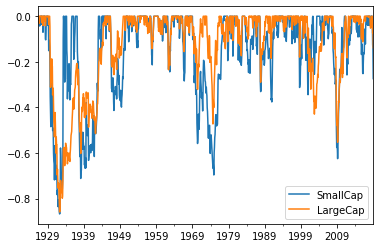

In [247]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [248]:
import edheck_risk_kit as erk

In [260]:
drawdown["1999":"2015"].min()


SmallCap   -0.624809
LargeCap   -0.552735
dtype: float64

## the date of maximum draw down over the period 1999-2015 (Q10,Q12)

In [263]:
drawdown["1999":"2015"].idxmin()

SmallCap    2009-02
LargeCap    2009-02
dtype: period[M]

## semideviation 2009-2018 (Q13,Q14)

In [268]:
hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                 header = 0, index_col= 0)

In [277]:
hfi.index = pd.to_datetime(hfi.index,format="%d/%m/%Y")

In [281]:
hfi.index = hfi.index.to_period("M")


In [284]:
%load_ext autoreload
%autoreload 2

In [301]:
erk.semideviation_frommean(hfi["2009":"2018"])

Convertible Arbitrage     0.690416
CTA Global                1.108957
Distressed Securities     1.057864
Emerging Markets          1.579181
Equity Market Neutral     0.518207
Event Driven              1.077592
Fixed Income Arbitrage    0.408700
Global Macro              0.539822
Long/Short Equity         1.263596
Merger Arbitrage          0.443971
Relative Value            0.624867
Short Selling             1.984615
Funds Of Funds            0.829679
dtype: float64

In [299]:
[erk.semideviation_frommean(hfi["2009":"2018"]).idxmax(),erk.semideviation_frommean(hfi["2009":"2018"]).max()]

['Short Selling', 1.984615216759599]

In [302]:
[erk.semideviation_frommean(hfi["2009":"2018"]).idxmin(),erk.semideviation_frommean(hfi["2009":"2018"]).min()]

['Fixed Income Arbitrage', 0.40870023006468403]

## skewness ove the period 2009-2018.(Q15,Q16)

In [305]:
hfi["2009":"2018"].skew()

Convertible Arbitrage     1.322642
CTA Global                0.052729
Distressed Securities    -0.258211
Emerging Markets          0.033547
Equity Market Neutral    -0.907811
Event Driven             -0.495083
Fixed Income Arbitrage    1.135821
Global Macro              0.352645
Long/Short Equity        -0.469644
Merger Arbitrage         -0.558124
Relative Value            0.162002
Short Selling             0.462367
Funds Of Funds           -0.655196
dtype: float64

In [310]:
[hfi["2009":"2018"].skew().idxmin(),hfi["2009":"2018"].skew().min()]

['Equity Market Neutral', -0.9078106090203241]

In [321]:
[hfi["2009":"2018"].skew().idxmax(),hfi["2009":"2018"].skew().max()]

['Convertible Arbitrage', 1.3226416000967929]